<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Esteban Cordova</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV: 
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

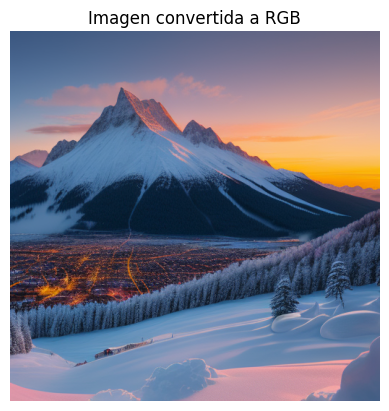

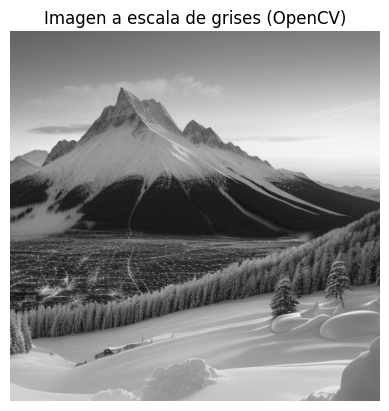

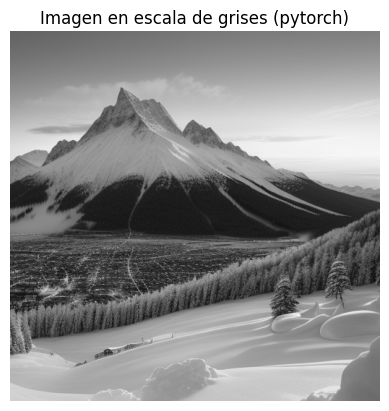

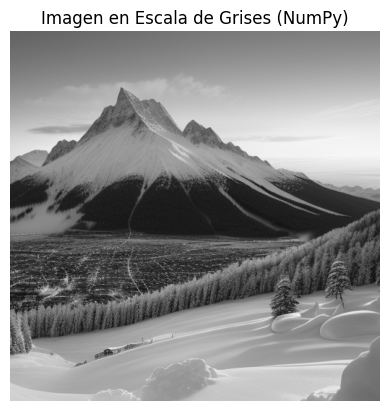

In [ ]:
import cv2        # Para leer imágenes
import numpy as np  # Para manejar la imagen como arreglo
import matplotlib.pyplot as plt
from torchvision import transforms
import torch

ruta_imagen = 'image.png'  # Cambia esto si tu imagen tiene otro nombre o ruta
imagen_bgr = cv2.imread(ruta_imagen)

imagen_rgb2 = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB) #ARREGLO DE OPENCV
imagen_np = np.array(imagen_rgb2, dtype=np.float32)/255 
# Convertir a escala de grises utilizamos el arreglo de numpy anterior
# y aplicamos los cambios
imagen_gris_np = (0.2989 * imagen_rgb2[:, :, 0] +  # Canal R selecciona todas las filas, todas las columnas y solo el primer canal (red) de una imagen RGB.
                  0.5870 * imagen_rgb2[:, :, 1] +  # Canal G selecciona todas las filas, todas las columnas y solo el primer canal (green) de una imagen RGB.
                  0.1140 * imagen_rgb2[:, :, 2])   # Canal B selecciona todas las filas, todas las columnas y solo el primer canal (blue) de una imagen RGB.

img_torch = torch.from_numpy(imagen_np).float() # (H, W, C)

# Convertir a (C, H, W) — esto es lo que espera PyTorch
img_torch = img_torch.permute(2, 0, 1)  # (3, H, W)

# Si está en (H, W, C), separar canales así:
r, g, b = img_torch[:, :, 0], img_torch[:, :, 1], img_torch[:, :, 2]

# Convertir a grises usando la fórmula estándar
img_gray = 0.299 * r + 0.587 * g + 0.114 * b  # resultado: (H, W)



# Usar transforms.Grayscale para obtener un canal (1, H, W)
to_gray = transforms.Grayscale()
img_gray = to_gray(img_torch)  # Resultado: (1, H, W)



# Mostrar con matplotlib
plt.imshow(imagen_rgb2) 
plt.title("Imagen convertida a RGB")
plt.axis("off")
plt.show()

imagen_gris_cv2 = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(imagen_gris_cv2, cmap='gray')  
plt.title("Imagen a escala de grises (OpenCV)")
plt.axis("off")
plt.show()

plt.imsave('imagen_gris.jpg', imagen_gris_cv2, cmap='gray')
plt.imshow(img_gray.squeeze().numpy(), cmap='gray')
plt.title("Imagen en escala de grises (pytorch)")
plt.axis("off")
plt.show()

plt.imshow(imagen_gris_np, cmap='gray')
plt.title("Imagen en Escala de Grises (NumPy)")
plt.axis("off")
plt.show()





## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

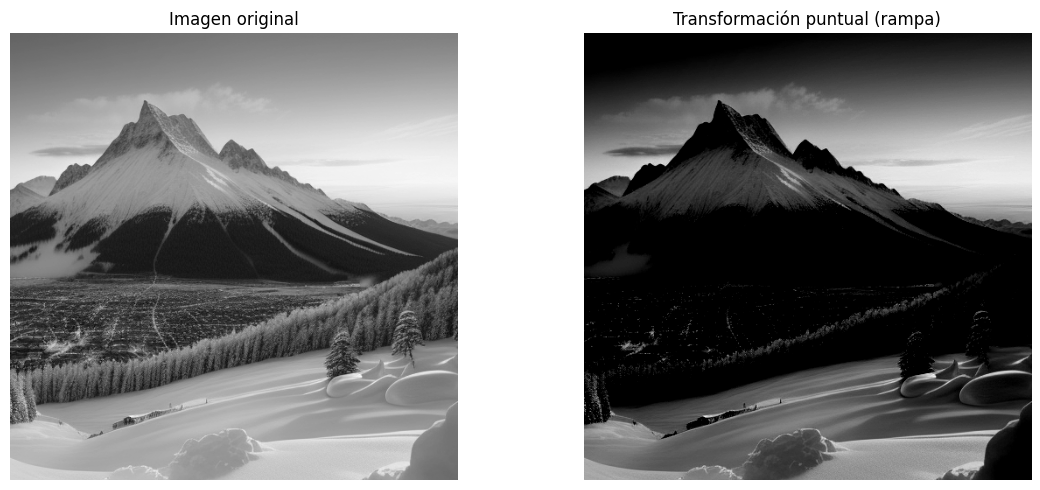

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
imagen = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)


# Convertir a float32 para cálculo
imagen = imagen.astype(np.float32)

# Definir parámetros de la función rampa
umbral = 100      # Threshold
pendiente = 2     # Pendiente (m)

# Calcular límite superior para evitar que s(r) > 255
r_max = umbral + 255 / pendiente

# Aplicar transformación rampa
resultado = np.where(
    imagen < umbral,
    0,
    np.where(imagen > r_max, 255, pendiente * (imagen - umbral))
)

# Asegurar que los valores estén entre 0 y 255
resultado = np.clip(resultado, 0, 255).astype(np.uint8)

# Mostrar resultados
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen original")
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Transformación puntual (rampa)")
plt.imshow(resultado, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


#### 2.2 Aplica una transformación en la vecindad. 
- Debes hacer una vecindad con dimensiones de 5x5 pixeles. 
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

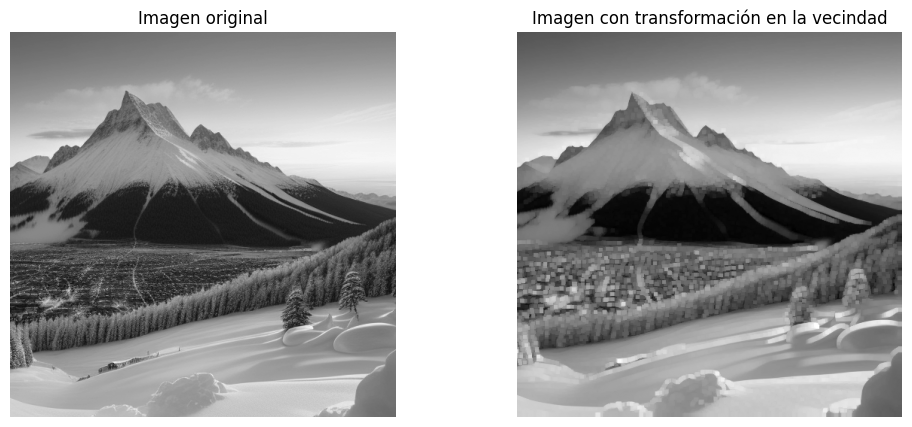

In [10]:
def vecindad(imagen, Tvecindad):
  """
  Calcula la transformación en la vecindad de una imagen.

  Parámetros:

  imagen: Imagen a transformar.
  Tvecindad: Tamaño de la vecindad.
  """
  imgVec = np.zeros_like(imagen) #Nos aseguramos que el valor minimo sea 0 y el máximo 255

  #Iteración sobre la imagen con desplazamiento de tamaño de vecindad
  for i in range(imagen.shape[0] - Tvecindad + 1):
    for j in range(imagen.shape[1] - Tvecindad + 1):

      vecindad = imagen[i:i+Tvecindad, j:j+Tvecindad] #vecindad de imagen en posición actual
      maxVec = np.max(vecindad, axis=(0,1)) #Valor máximo de la vecindad
      imgVec[i:i+Tvecindad, j:j+Tvecindad] = maxVec #Se asigna el valor máximo a toda la vecindad

  return imgVec

Tvecindad = 5 #Tamaño de la vecindad de 5x5
imagenVecindad = vecindad(imagen_gris_cv2, Tvecindad) #Se crea imagen con transformación en la vecindad

#Mostrar imagen png original y con transformación en la vecindad
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(imagen_gris_cv2,cmap='gray' )
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(imagenVecindad, cmap='gray')
plt.title("Imagen con transformación en la vecindad")
plt.axis("off")

#### 2.3 Aplica transformación de intensidad
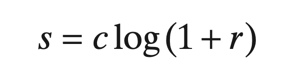
- Debes hacer una vecindad con dimensiones de 10x10 pixeles. 
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

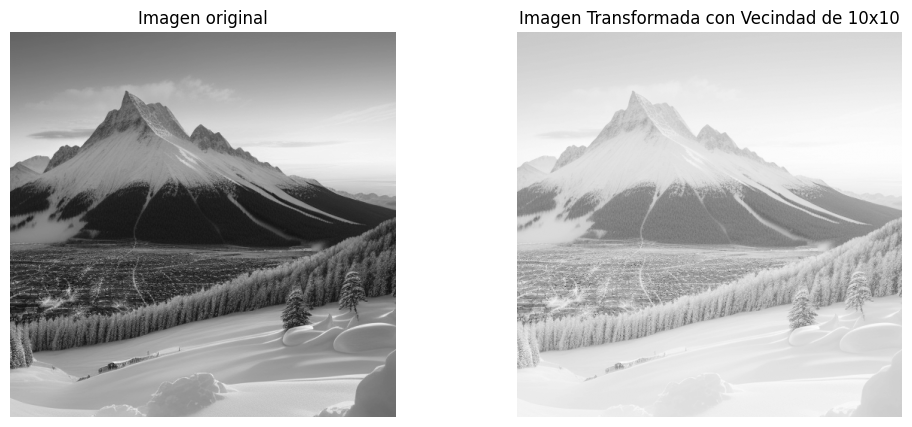

In [9]:
import cv2
import numpy as np

# Leer la imagen en escala de grises
imagen = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Asegurarse de que sea tipo float32 para aplicar log
imagen = imagen.astype(np.float32)

# Parámetro c (ajustable)
c = 40

# Crear una imagen de salida del mismo tamaño
salida = np.zeros_like(imagen)

# Obtener dimensiones de la imagen
alto, ancho = imagen.shape

# Recorrer la imagen en bloques de 10x10
for i in range(0, alto, 10):
    for j in range(0, ancho, 10):
        # Extraer bloque (manejo de bordes si no encaja exacto)
        bloque = imagen[i:i+10, j:j+10]

        # Aplicar la transformación: s = c * log(1 + r)
        bloque_transformado = c * np.log(1 + bloque)

        # Limitar valores al rango [0, 255]
        bloque_transformado = np.clip(bloque_transformado, 0, 255)

        # Asignar bloque transformado a la salida
        salida[i:i+10, j:j+10] = bloque_transformado

# Convertir a uint8 para mostrar o guardar
salida = salida.astype(np.uint8)



#Mostrar imagen png original y con transformación en la vecindad
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(imagen.astype(np.uint8),cmap='gray' )
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(salida, cmap='gray')
plt.title("Imagen Transformada con Vecindad de 10x10")
plt.axis("off")


#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada. 
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

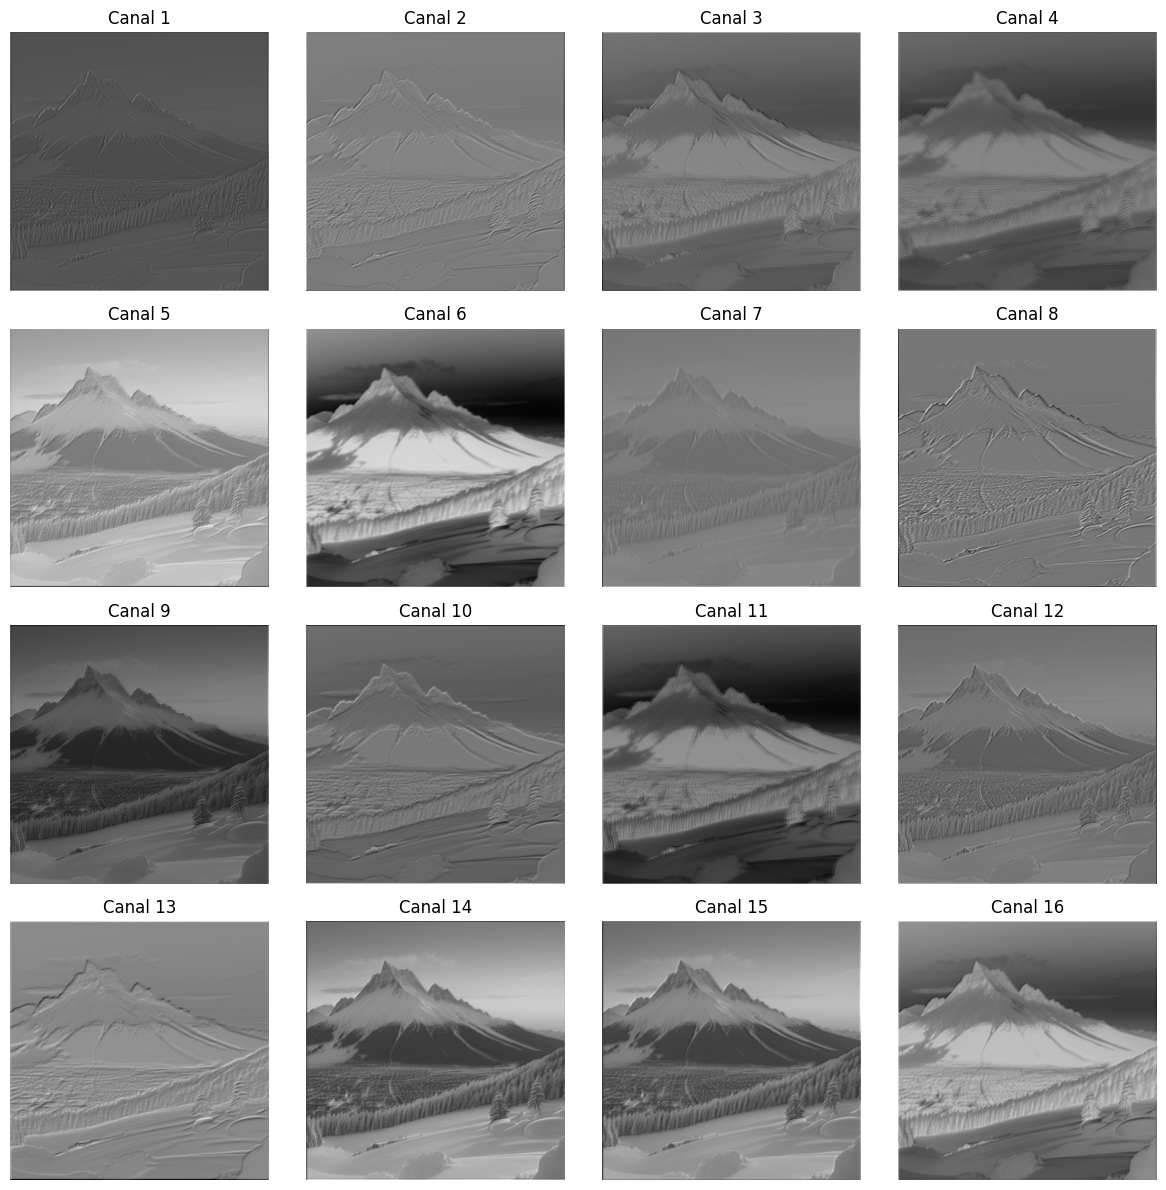

In [2]:
import torch
import torch.nn as nn
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer imagen en escala de grises y normalizar [0,1]
img = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32) / 255.0
img_tensor = torch.from_numpy(img).unsqueeze(0).unsqueeze(0)  # [1, 1, H, W]

# Definir las capas convolucionales en cascada
conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)

# Aplicar convoluciones
x1 = conv1(img_tensor)
x2 = conv2(x1)
x3 = conv3(x2)  # Resultado final con 16 canales

# Visualizar los 16 canales
x3_np = x3.squeeze(0).detach().numpy()  # [16, H, W]

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x3_np[i], cmap='gray')
    plt.title(f'Canal {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


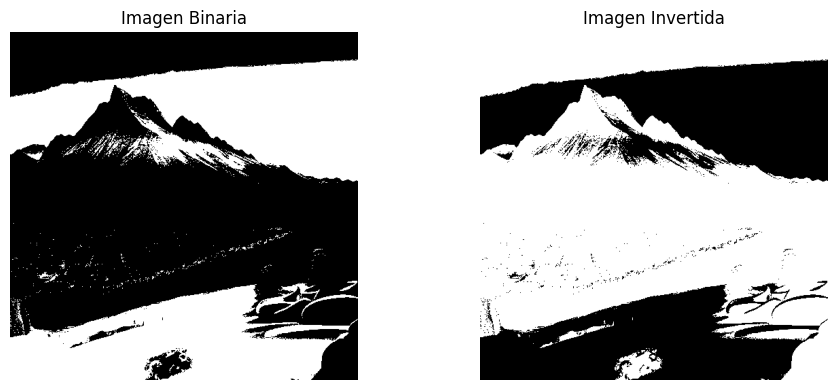

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#  Cargar la imagen
imagen = mpimg.imread('image.png')

#  Convertir a escala de grises si es RGB
if imagen.ndim == 3:
    imagen = imagen[:, :, 0]*0.299 + imagen[:, :, 1]*0.587 + imagen[:, :, 2]*0.114

# Asegurar que los valores estén en el rango 0-255
if imagen.max() <= 1.0:
    imagen = imagen * 255

imagen = imagen.astype(np.uint8)

#  Binarización: aplicar un umbral
umbral = 127
imagen_binaria = np.where(imagen > umbral, 255, 0).astype(np.uint8)

# Invertir la imagen binaria
imagen_invertida = 255 - imagen_binaria

#  Mostrar resultados
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen Binaria')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_invertida, cmap='gray')
plt.title('Imagen Invertida')
plt.axis('off')

plt.tight_layout()
plt.show()


### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



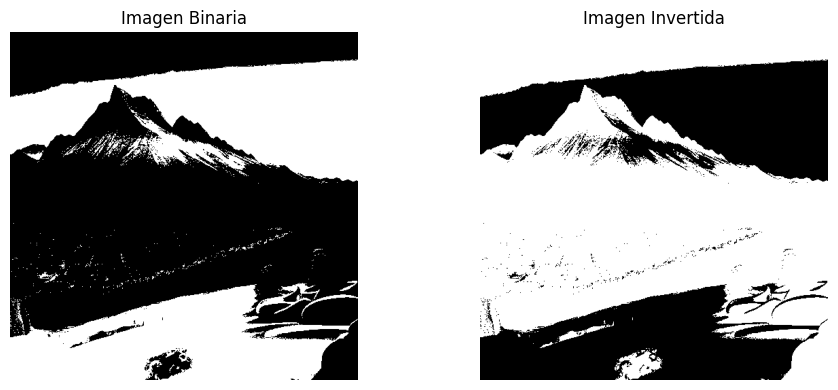

In [ ]:
import cv2
import torch
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises con OpenCV
img = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)


# Binarizar la imagen (si no lo está ya)
_, img_binaria = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Convertir a tensor PyTorch
img_tensor = torch.from_numpy(img_binaria).type(torch.uint8)

# Invertir la imagen: 255 - img
img_invertida = 255 - img_tensor

# Mostrar ambas
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_tensor.numpy(), cmap='gray')
plt.title("Imagen Binaria")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_invertida.numpy(), cmap='gray')
plt.title("Imagen Invertida")
plt.axis('off')

plt.tight_layout()
plt.show()


## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor. 
    

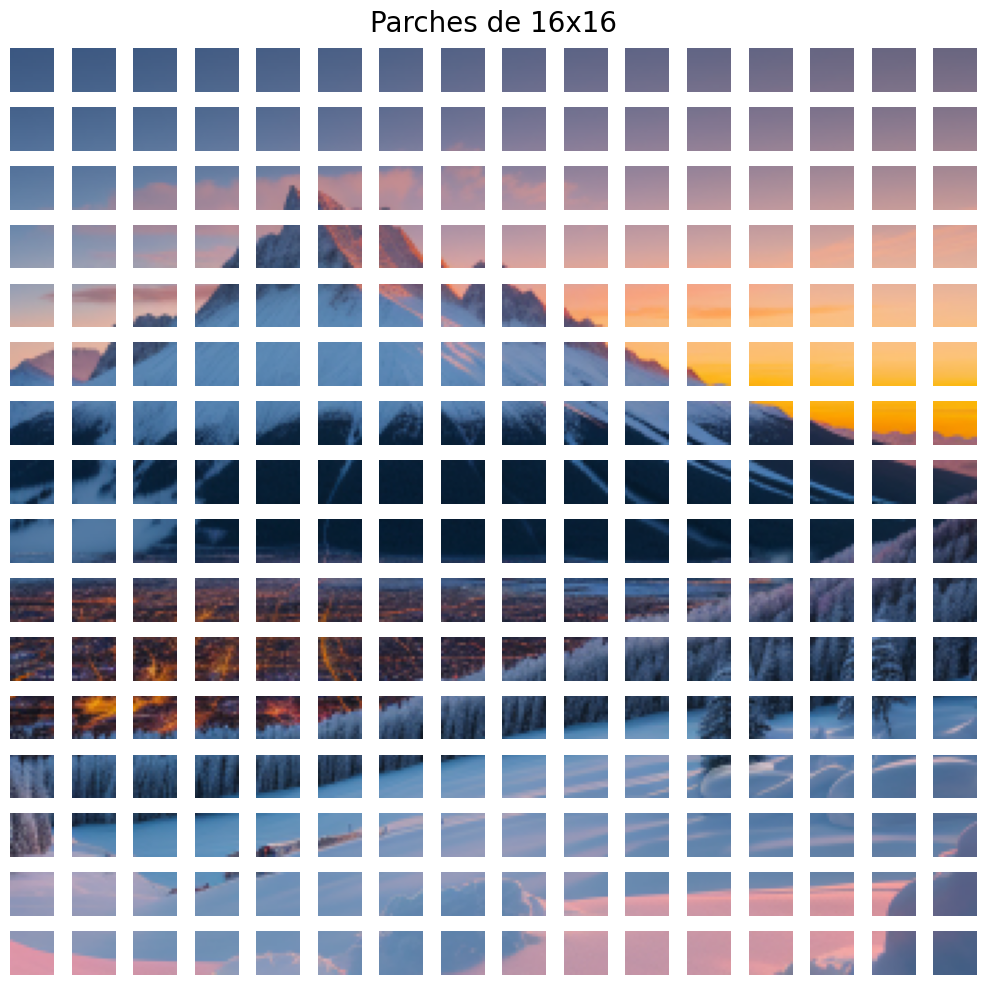

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def dividir_en_parches(imagen, tam_parche=16):
    h, w, c = imagen.shape
    parches = []
    
    for i in range(0, h, tam_parche):
        for j in range(0, w, tam_parche):
            parche = imagen[i:i+tam_parche, j:j+tam_parche, :]
            parches.append(parche)
    
    return parches

# Leer imagen
imagen = cv2.imread('image.png')


# Convertir a RGB
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

#Redimensionar a 256x256 
imagen = cv2.resize(imagen, (256, 256))

# Dividir en parches de 16x16
parches = dividir_en_parches(imagen, tam_parche=16)

# Mostrar todos los parches
n = len(parches)
cols = 16
rows = 16

plt.figure(figsize=(10, 10))
for idx, parche in enumerate(parches):
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(parche)
    plt.axis('off')
plt.suptitle("Parches de 16x16", fontsize=20)
plt.tight_layout()
plt.show()



## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
